In [12]:
%load_ext autoreload

In [15]:
%autoreload
from image_cleaner import *

CPU times: user 17.7 s, sys: 7.65 s, total: 25.3 s
Wall time: 12.4 s


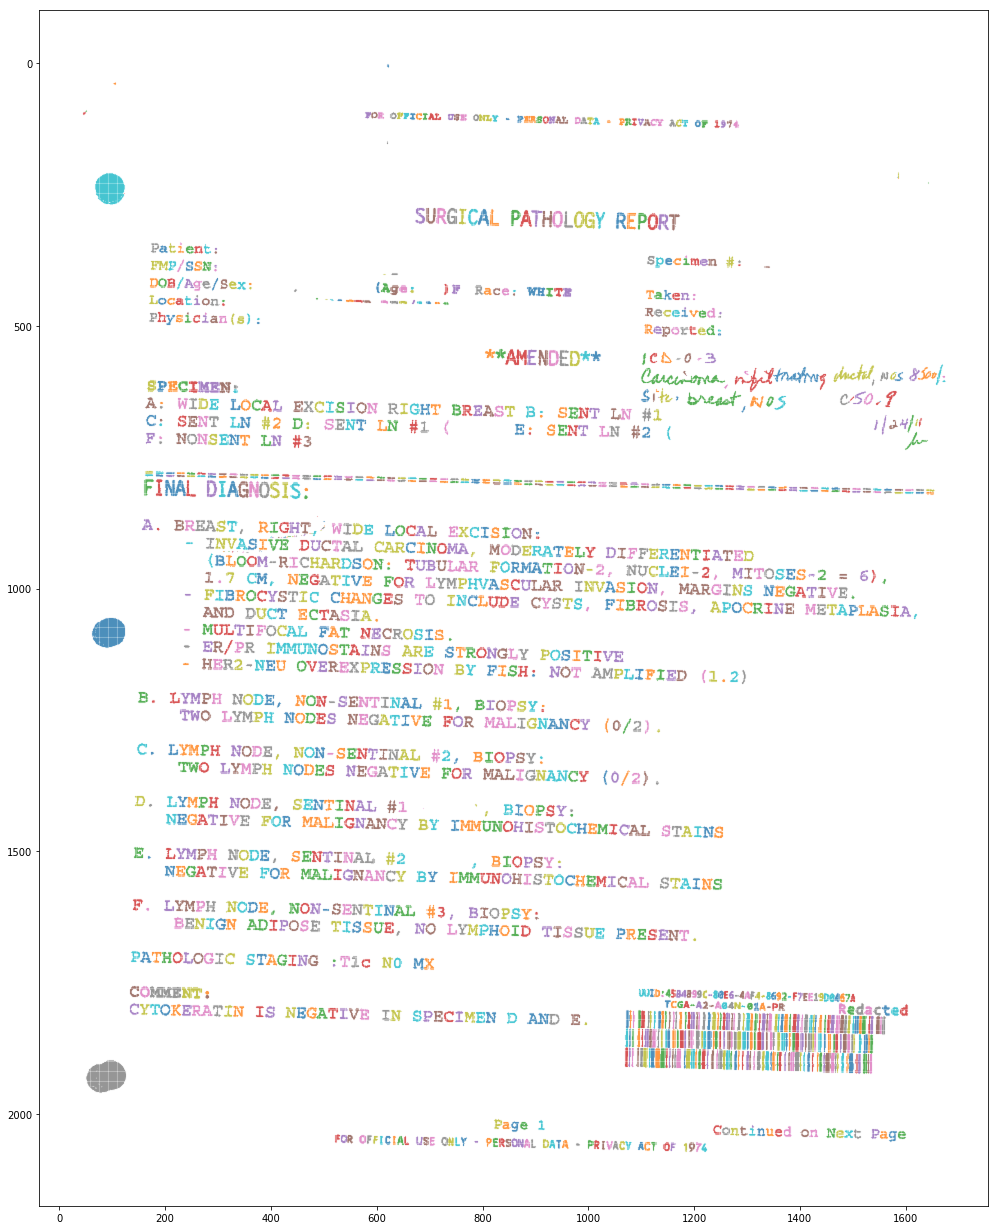

In [4]:
%%time
# find each letter of page

filename = 'pngs/TCGA-A2-A04N-pg1.png'

d_chart = black_and_white(filename)
X = blacklist(1-d_chart)
objects = find_objects(X)

bigg(plt)
for o in objects:
    plot_col(o)
flip(plt)

CPU times: user 12.8 s, sys: 4.54 s, total: 17.3 s
Wall time: 8.14 s


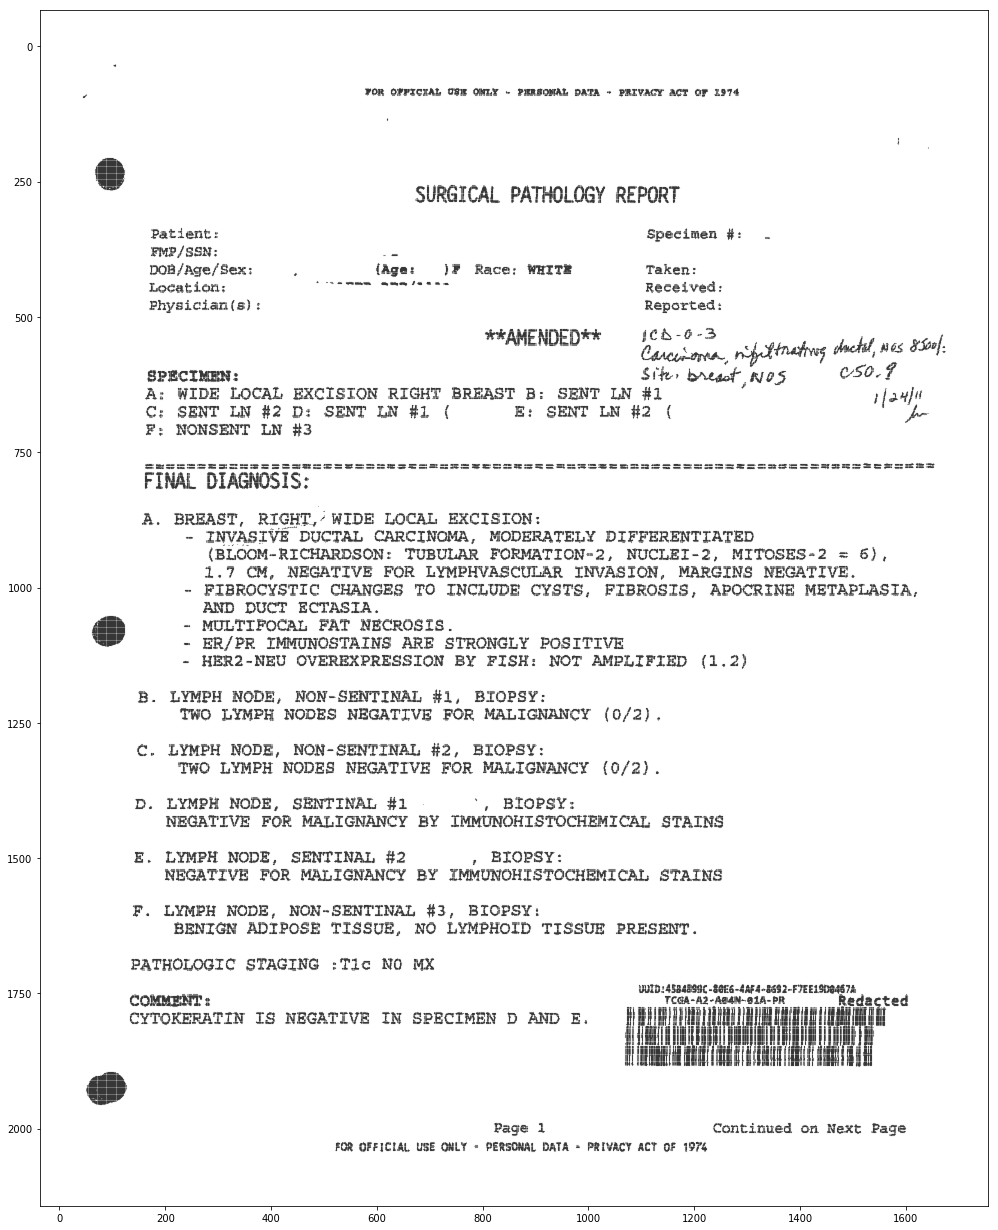

In [5]:
%%time
# align text

objects_aligned = droop_corrector(objects)

bigg(plt)
for o in objects_aligned:
    plot_col(o,c='black')
flip(plt)

CPU times: user 9.33 s, sys: 3.9 s, total: 13.2 s
Wall time: 7.85 s


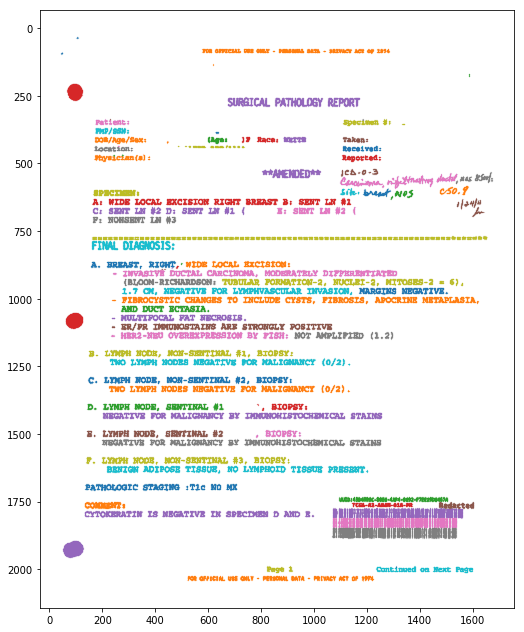

In [32]:
%%time
# group into rows

line_groups = get_line_groups(objects_aligned)

bigg(plt,(8.5,11))
for L in line_groups:
    o_line = np.concatenate([objects_aligned[l] for l in L])
    plot_col(o_line)
flip(plt)

In [40]:
line_text=[]
for U in line_groups:
    ou = np.concatenate([objects_aligned[u] for u in U])
    text = ocr_lite(picture_this_tiny(ou,4),UPSCALE_FACTOR=1)
    line_text.append(text)
line_text

['',
 'POR OFFICIAL USE ONLY PERSONAL DATA PRIVACY ACT OF 1974',
 '',
 '',
 '',
 '',
 'Patient:',
 '',
 'Specimen #:',
 'FMP/SSN:',
 '',
 'DOB/Age/Sex:',
 '{Age:',
 'JF Race:',
 '',
 'Taken:',
 '',
 'Location:',
 'El SEE RN',
 '',
 'Received:',
 'Physician(se)',
 '',
 'Reported:',
 '**AMENDED**',
 '[I',
 '',
 'Rae',
 '',
 'Sites',
 '',
 '',
 'NOS',
 'A: WIDE LOCAL EXCISION RIGHT EREAST B: SENT LN',
 'C: SENT LN #2 D: SENT LN #1 «(',
 'Eri',
 '2c\n#2',
 'F: NONSENT LN #3',
 '',
 '',
 'A. BREAST, RIGHT',
 '',
 '',
 '',
 '',
 '',
 'INVASIVE DUCTAL CARCINOMA, MODERATELY DIFFERENTIATED',
 '{BLOOM-RICHARDSON:',
 'TUBULAR FORMATION-2, NUCLEI-2, MITOSES-2 6),',
 '1.7 CM, NEGATIVE FOR LYMPHVASCULAR INVASION,',
 '',
 'PIBROCYSTIC CHANGES TO INCLUDE CYSTS, FIBROSIS, APOCRINE METAPLASIA,',
 'AND DUCT ECTASIA.',
 '',
 '',
 'ER/PR IMMUNCSTAINS ARE STRONGLY POSITIVE',
 '',
 'NOT AMPLIFIED (1.2)',
 'B. LYMPH NODE, NON-SENTINAL #1, BIOPSY:',
 'TWO LYMPH NODES NEGATIVE FOR MALIGNANCY (0/2).',
 'C. LYMPH

**AMENDED**


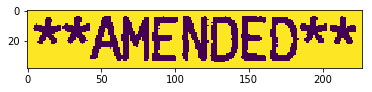

NEGATIVE FOR MALIGNANCY BY IMMUNOHISTOCHEMICAIL STAINS


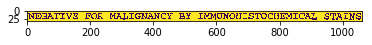

TCGA-A2-A94N-01A-PR


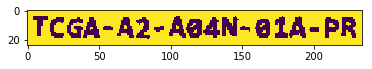

ER/PR IMMUNCSTAINS ARE STRONGLY POSITIVE


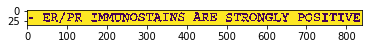

POR OFFICIAL USE ONLY PERSONAL DATA PRIVACY ACT OF 1974


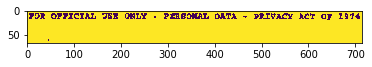

Rae


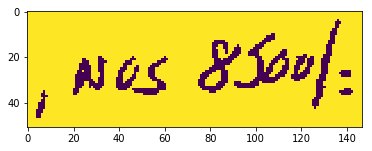

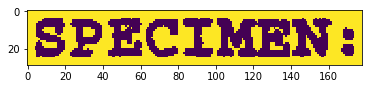

In [6]:
# pass each row into OCR
for U in np.random.choice(line_groups,10,replace=False):
    ou = np.concatenate([objects_aligned[u] for u in U])
    text = ocr_lite(picture_this_tiny(ou,4),UPSCALE_FACTOR=1)
    if text!='' or len(ou)>100:
        print(text)
        plt.imshow(1-picture_this_tiny(ou,4))
        plt.show()

CPU times: user 14.7 s, sys: 9.4 s, total: 24.1 s
Wall time: 5.35 s


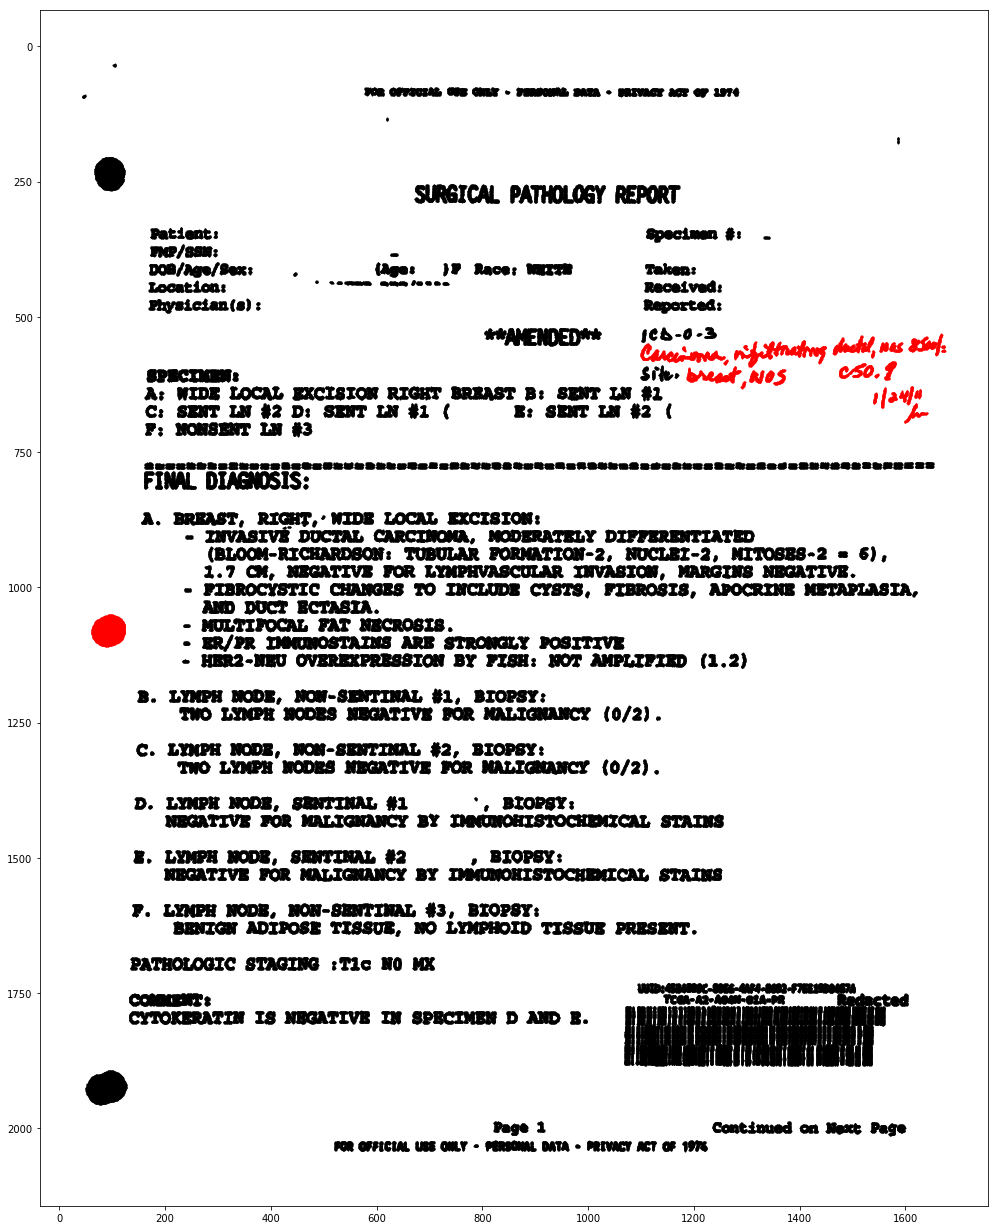

In [7]:
%%time
# tag handwriting

bigg(plt)
for L in line_groups:
    O = [objects_aligned[l] for l in L]
    htO = Counter([handwriting_or_text(o) for o in O])
    nO = np.concatenate(O)
    if htO[1]>htO[0]:
        plot_col(nO,s=1,c='red')
    else:
        plot_col(nO,s=1,c='black')
flip(plt)

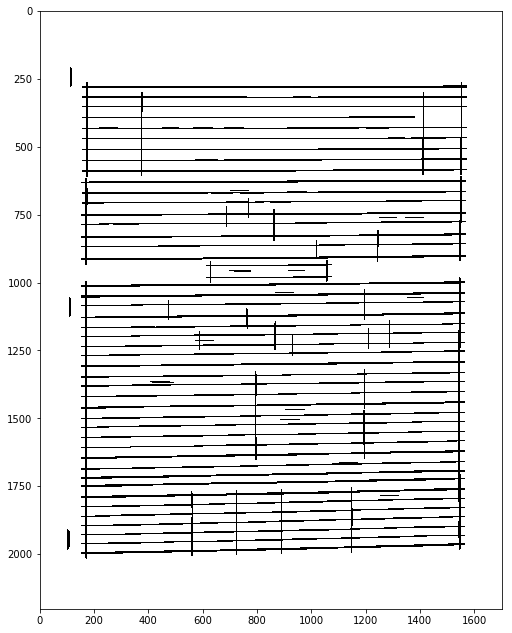

CPU times: user 22.6 s, sys: 3.65 s, total: 26.3 s
Wall time: 21.7 s


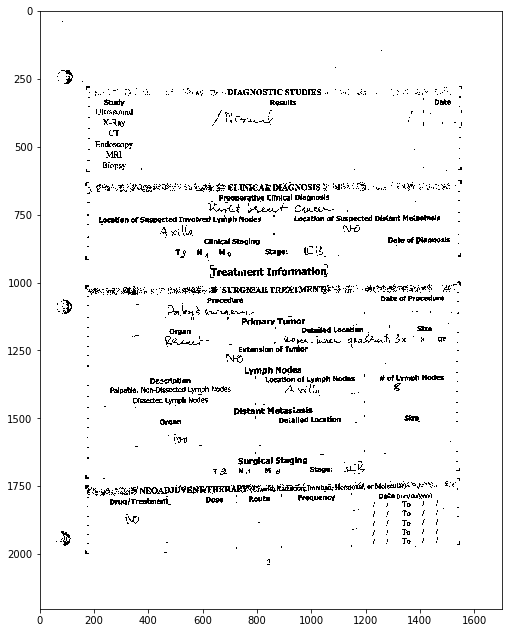

In [46]:
%%time
# split table from text

filename2 = 'pngs/TCGA-C8-A1HK-pg3.png'

d_chart2 = black_and_white(filename2)

d_chart_wo, d_table = table_splitter(d_chart2)

bigg(plt,(8.5,11))
plt.imshow(d_table,cmap='gray')
plt.show()

bigg(plt,(8.5,11))
plt.imshow(d_chart_wo,cmap='gray')

CPU times: user 59.9 s, sys: 4.84 s, total: 1min 4s
Wall time: 57.8 s


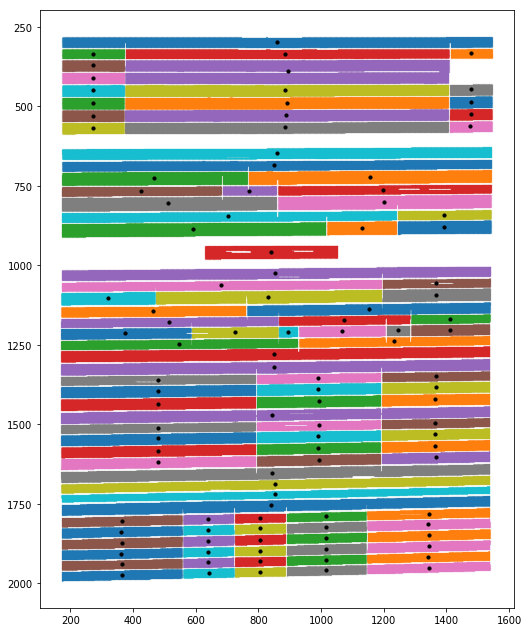

In [47]:
%%time
# find cells in table

Xinv=blacklist(d_table)
inverse_objects=find_objects(Xinv)
inverse_objects = [i for i in inverse_objects 
                   if len(i)>100 and hei(i)<2000]
inv_com = [com(i) for i in inverse_objects]

bigg(plt,(8.5,11))
for i in inverse_objects:
    plot_col(i)
plot_col(inv_com,s=10,c='black')
flip(plt)

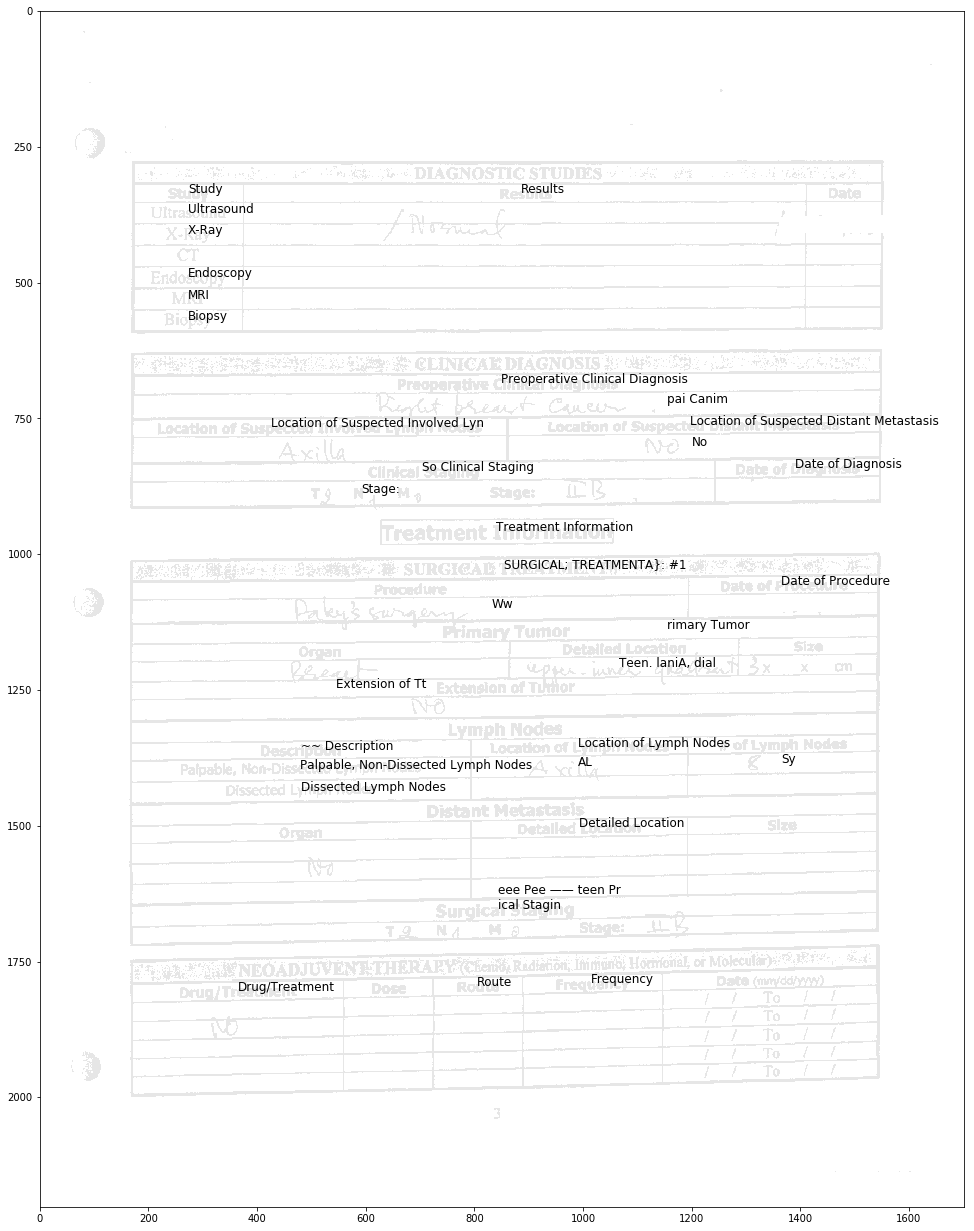

____
|  |
~~~~
______________________
| Study | Results |  |
~~~~~~~~~~~~~~~~~~~~~~
____
|  |
~~~~
______________
| Ultrasound |
~~~~~~~~~~~~~~
_________
| X-Ray |
~~~~~~~~~
__________
|  |  |  |
~~~~~~~~~~
___________________
| Endoscopy |  |  |
~~~~~~~~~~~~~~~~~~~
_____________
| MRI |  |  |
~~~~~~~~~~~~~
________________
| Biopsy |  |  |
~~~~~~~~~~~~~~~~
____
|  |
~~~~
___________________________________
| Preoperative Clinical Diagnosis |
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
________________
|  | pai Canim |
~~~~~~~~~~~~~~~~
____________________________________________________________________________________
| Location of Suspected Involved Lyn |  | Location of Suspected Distant Metastasis |
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
_________
|  | No |
~~~~~~~~~
___________________________________________
| So Clinical Staging | Date of Diagnosis |
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
________________
| Stage: |  |  |
~~~~~~~~~~~~~~~

In [48]:
%%time
# extract table text in tabular format

rows = get_table_rows(inverse_objects)
table = make_table(rows, filename2)

bigg(plt)
plt.imshow(d_chart2,cmap='gray',alpha=.1)
for R,T in zip(rows,table):
    for r,t in zip(R,T):
        plt.text(x=com(r)[0],y=com(r)[1],s=t,fontsize=12)
plt.show()

for t in table:
    row = '| '+' | '.join(t)+' |'
    print('_'*len(row))
    print(row)
    print('~'*len(row))